# VR Arcade Location Assessment-Toronto
## Capstone Project

## Introduction



The intention of the project is not an in-depth research but rather to take a snapshot and try to have an idea and an understanding on whether University and College locations and Virtual Reality Arcades are established in close vicinity due to it's popularity and possible demand among young adults and if so the question is does this indicate any relationship and possible new locations for new business opportunities. The target audience might be entrepreneurs who might might be interested in opening up a VR Arcade center.

With this intention the locations of the VR arcades and the schools will be identified and mapped out for further research and assessment.

### __Problem Statement__

1.	Where are the Universities-Colleges in Toronto are located?
2.	How many VR Arcades are there and how are they distributed in Toronto?
3.	Is the assumption ,'Colleges and VR Arcades are being established near each other do to it's popularity and demand among young adults', is accurate and if so is there room for investment?

### __Data__

Due to FourSquares limitations on gathering information on Universities and Colleges, names and coordinates of the University and Colleges will be researched, gathered, and uploaded separately.

All data related to locations  of VR Arcades will be obtained via the FourSquare API utilized via the Request library in Python.


### __Methodology__
•	Data will be collected, cleaned, and processed into a dataframe.

•	FourSquare will be used to locate related venues. 

•	Finally, the data be will be visually assessed via map locations from Python libraries.

### Table of Contents

1. Foursquare-Searching for VR arcades in Toronto 
2. Searching for the University-Colleges in Toronto 
3. Uploading and Assessing list of Colleges and Universities   
4. Conclusion


### Import necessary Libraries

In [131]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

In [4]:
CLIENT_ID = 'IT2PI11FT115M2LWAKZYGFT3XRXZAUQXGF3NJ5CL0TF2XTF0' # your Foursquare ID
CLIENT_SECRET = '0N5LK403LWFKO54TCTOG5ME3IECKZXVN1XE0E0HADCZ0WUAN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 60
LIMIT2= 60
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IT2PI11FT115M2LWAKZYGFT3XRXZAUQXGF3NJ5CL0TF2XTF0
CLIENT_SECRET:0N5LK403LWFKO54TCTOG5ME3IECKZXVN1XE0E0HADCZ0WUAN


#### Defining address

In [5]:
address = 'University of Toronto, Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.663461999999996 -79.39775965337452


<a id="item1"></a>

## 1. Foursquare -  Searching for VR Arcades in Toronto


In [122]:
search_query = 'VR Arcade'
radius = 20000
print(search_query + ' .... OK!')

VR Arcade .... OK!


In [124]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IT2PI11FT115M2LWAKZYGFT3XRXZAUQXGF3NJ5CL0TF2XTF0&client_secret=0N5LK403LWFKO54TCTOG5ME3IECKZXVN1XE0E0HADCZ0WUAN&ll=43.663461999999996,-79.39775965337452&v=20180604&query=VR Arcade&radius=40000&limit=60'

#### Sending the GET Request and examining the results

In [125]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eca7aebfb34b5001b60c7e3'},
 'response': {'venues': [{'id': '59c30345f79faa694c0394bf',
    'name': 'Levelup Virtual Reality (Vr) Arcade',
    'location': {'address': '384 Yonge Street Unit 28\xa0',
     'lat': 43.65917,
     'lng': -79.382774,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65917,
       'lng': -79.382774}],
     'distance': 1297,
     'postalCode': 'M5B',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['384 Yonge Street Unit 28\xa0',
      'Toronto ON M5B',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e1931735',
      'name': 'Arcade',
      'pluralName': 'Arcades',
      'shortName': 'Arcade',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/arcade_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590328204',
    'hasPerk': False},
   {'id': '58dda06a528930451a972a14',
    'na

#### Getting relevant part of JSON and transforming it into a *pandas* dataframe

In [126]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood
0,59c30345f79faa694c0394bf,Levelup Virtual Reality (Vr) Arcade,"[{'id': '4bf58dd8d48988d1e1931735', 'name': 'A...",v-1590328204,False,384 Yonge Street Unit 28,43.659170,-79.382774,"[{'label': 'display', 'lat': 43.65917, 'lng': ...",1297,M5B,CA,Toronto,ON,Canada,"[384 Yonge Street Unit 28 , Toronto ON M5B, Ca...",NaN,NaN
1,58dda06a528930451a972a14,VRPlayin,"[{'id': '4bf58dd8d48988d18d941735', 'name': 'G...",v-1590328204,False,294 College St,43.657769,-79.401604,"[{'label': 'display', 'lat': 43.657769, 'lng':...",705,NaN,CA,Toronto,ON,Canada,"[294 College St (Spadina Ave), Toronto ON, Can...",Spadina Ave,NaN
2,515ba0e6183f478f41ff91e2,VroomVroomVroom,"[{'id': '4bf58dd8d48988d1ed931735', 'name': 'A...",v-1590328204,False,"5 - 112 Elizabeth Street, Suite 282",43.656416,-79.386885,"[{'label': 'display', 'lat': 43.65641564830964...",1175,M5G 1P5,CA,Toronto,ON,Canada,"[5 - 112 Elizabeth Street, Suite 282, Toronto ...",NaN,NaN
3,5963af7b9746173e67c2b147,VusionVR,"[{'id': '56aa371be4b08b9a8d573517', 'name': 'B...",v-1590328204,False,511 Bloor Street West,43.665129,-79.408658,"[{'label': 'display', 'lat': 43.66512941601567...",896,M5S 1Y4,CA,Toronto,ON,Canada,"[511 Bloor Street West (Bloor & Bathurst), Tor...",Bloor & Bathurst,NaN
4,5963c587813488243dd62cdf,VusionVR,"[{'id': '5453de49498eade8af355881', 'name': 'B...",v-1590328204,False,200 - 511 Bloor Street West,43.664953,-79.408722,"[{'label': 'display', 'lat': 43.66495349957125...",898,M5S 1Y4,CA,Toronto,ON,Canada,[200 - 511 Bloor Street West (Bloor & Bathurst...,Bloor & Bathurst,NaN


#### Defining information of interest

In [127]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Levelup Virtual Reality (Vr) Arcade,Arcade,384 Yonge Street Unit 28,43.659170,-79.382774,"[{'label': 'display', 'lat': 43.65917, 'lng': ...",1297,M5B,CA,Toronto,ON,Canada,"[384 Yonge Street Unit 28 , Toronto ON M5B, Ca...",NaN,NaN,59c30345f79faa694c0394bf
1,VRPlayin,Gaming Cafe,294 College St,43.657769,-79.401604,"[{'label': 'display', 'lat': 43.657769, 'lng':...",705,NaN,CA,Toronto,ON,Canada,"[294 College St (Spadina Ave), Toronto ON, Can...",Spadina Ave,NaN,58dda06a528930451a972a14
2,VroomVroomVroom,Airport,"5 - 112 Elizabeth Street, Suite 282",43.656416,-79.386885,"[{'label': 'display', 'lat': 43.65641564830964...",1175,M5G 1P5,CA,Toronto,ON,Canada,"[5 - 112 Elizabeth Street, Suite 282, Toronto ...",NaN,NaN,515ba0e6183f478f41ff91e2
3,VusionVR,Business Center,511 Bloor Street West,43.665129,-79.408658,"[{'label': 'display', 'lat': 43.66512941601567...",896,M5S 1Y4,CA,Toronto,ON,Canada,"[511 Bloor Street West (Bloor & Bathurst), Tor...",Bloor & Bathurst,NaN,5963af7b9746173e67c2b147
4,VusionVR,Business Service,200 - 511 Bloor Street West,43.664953,-79.408722,"[{'label': 'display', 'lat': 43.66495349957125...",898,M5S 1Y4,CA,Toronto,ON,Canada,[200 - 511 Bloor Street West (Bloor & Bathurst...,Bloor & Bathurst,NaN,5963c587813488243dd62cdf
5,Vrcade,Arcade,259 Richmond Street West,43.648890,-79.391174,"[{'label': 'display', 'lat': 43.64889, 'lng': ...",1706,M5V 3M6,CA,Toronto,ON,Canada,"[259 Richmond Street West (John), Toronto ON M...",John,NaN,5e055795a66f9d00089a6050
6,Village Arcade,Shopping Mall,50 Cumberland,43.671043,-79.388584,"[{'label': 'display', 'lat': 43.67104320286615...",1121,NaN,CA,Toronto,ON,Canada,"[50 Cumberland, Toronto ON, Canada]",NaN,NaN,4bdf0c250ee3a59340c832b0
7,House of VR,Event Space,NaN,43.647277,-79.403385,"[{'label': 'display', 'lat': 43.647277, 'lng':...",1857,M5V 2B7,CA,Toronto,ON,Canada,"[Toronto ON M5V 2B7, Canada]",NaN,NaN,59261f1df62e094ad2a3e2b9
8,Tomlinson Paul V Res,Lawyer,14 Thorncrest Rd,43.654284,-79.387743,"[{'label': 'display', 'lat': 43.654284105, 'ln...",1301,M5G 1T6,CA,Toronto,ON,Canada,"[14 Thorncrest Rd, Toronto ON M5G 1T6, Canada]",NaN,NaN,5e84dd5c5a533b00080d1592
9,Gym @ M5V Residences,Gym,King St. W.,43.645504,-79.392883,"[{'label': 'display', 'lat': 43.64550388365337...",2037,NaN,CA,Toronto,ON,Canada,"[King St. W., Toronto ON, Canada]",NaN,NaN,4efbd2b3f9ab0847f97e28d6


#### Let's visualize the VR Arcades in Toronto

In [115]:
dataframe_filtered.name

0     Levelup Virtual Reality (Vr) Arcade
1                                VRPlayin
2                         VroomVroomVroom
3                                VusionVR
4                                VusionVR
5                                  Vrcade
6                          Village Arcade
7                             House of VR
8                    Tomlinson Paul V Res
9                    Gym @ M5V Residences
10                           Arcade Coins
11                          jonny5 arcade
12                    De Vries Litigation
13                        Tilt Arcade Bar
14                       Nations - Arcade
15                        Vradenburg Park
16               Vradenburg Public School
17                       Cineplex Cinemas
Name: name, dtype: object

<a id="item2"></a>

In [121]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map)


for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            popup=label,
            fill = True,
            fill_color='yellow',
            fill_opacity=0.6
        ).add_to(venues_map)
    
    
# display map
venues_map

## - INSIGHT- 
### According to Foursquare there are 17 locations listed under VR Arcade. I have superimposed their locations on the Toronto map.

## 2.Searching for the University-Colleges in Toronto 


In [33]:
address2 = 'University of Toronto, Toronto, Canada'
geolocator2 = Nominatim(user_agent="foursquare_agent")
location2 = geolocator.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print(latitude2, longitude2)

43.663461999999996 -79.39775965337452


#### Seaching for Colleges and Universities

In [34]:
search_query2 = "College" and "University"
radius2 = 3000
print(search_query2 + ' .... OK!')

University .... OK!


#### Defined the corresponding URL

In [35]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query2, radius2, LIMIT2)
url

'https://api.foursquare.com/v2/venues/search?client_id=IT2PI11FT115M2LWAKZYGFT3XRXZAUQXGF3NJ5CL0TF2XTF0&client_secret=0N5LK403LWFKO54TCTOG5ME3IECKZXVN1XE0E0HADCZ0WUAN&ll=43.663461999999996,-79.39775965337452&v=20180604&query=VR Arcade&radius=3000&limit=60'

#### Send the GET Request and examine the results

In [36]:
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5eca49b9b57e88001b15b767'},
 'response': {'venues': [{'id': '4ad4c05ef964a52097f620e3',
    'name': 'University of Toronto',
    'location': {'address': "27 King's College Cir",
     'crossStreet': "at King's College Rd",
     'lat': 43.6624934706167,
     'lng': -79.39521976633822,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.6624934706167,
       'lng': -79.39521976633822}],
     'distance': 231,
     'postalCode': 'M5S 1A1',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ["27 King's College Cir (at King's College Rd)",
      'Toronto ON M5S 1A1',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1ae941735',
      'name': 'University',
      'pluralName': 'Universities',
      'shortName': 'University',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/default_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [120]:
# assign relevant part of JSON to venues
venues2 = results2['response']['venues']

# tranform venues into a dataframe
dataframe2 = pd.json_normalize(venues2)
dataframe2.head()


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4ad4c05ef964a52097f620e3,University of Toronto,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1590315357,False,27 King's College Cir,at King's College Rd,43.662493,-79.395220,"[{'label': 'display', 'lat': 43.6624934706167,...",231,M5S 1A1,CA,Toronto,ON,Canada,"[27 King's College Cir (at King's College Rd),...",57112483,NaN
1,4bbe3fdd1416a5931ce3f33c,University College Residence Office,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1590315357,False,79 St. George street,NaN,43.663331,-79.397947,"[{'label': 'display', 'lat': 43.66333075902387...",20,NaN,CA,Toronto,ON,Canada,"[79 St. George street, Toronto ON, Canada]",NaN,NaN
2,4d8a79ae6ce6a35de4a26142,University College Art Centre,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",v-1590315357,False,NaN,King College Circle and Tower Rd,43.663962,-79.395385,"[{'label': 'display', 'lat': 43.66396220617091...",199,NaN,CA,Toronto,ON,Canada,"[King College Circle and Tower Rd, Toronto ON,...",NaN,NaN
3,4bfd97014cf820a1c0b0ecf4,University of Toronto Arts Centre,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",v-1590315357,False,15 Kings College Circle,NaN,43.663605,-79.395159,"[{'label': 'display', 'lat': 43.66360538340076...",210,NaN,CA,Toronto,ON,Canada,"[15 Kings College Circle, Toronto ON, Canada]",NaN,NaN
4,4ad893f7f964a5207c1221e3,University College,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1590315357,False,15 King's College Circle,University of Toronto,43.662695,-79.396061,"[{'label': 'display', 'lat': 43.66269528389713...",161,M5S 3H7,CA,Toronto,ON,Canada,[15 King's College Circle (University of Toron...,NaN,NaN


#### Defining information of interest and filtering dataframe

In [38]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
dataframe2_filtered = dataframe2.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue2.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe2_filtered['categories'] = dataframe2_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe2_filtered.columns = [column.split('.')[-1] for column in dataframe2_filtered.columns]

dataframe2_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,University of Toronto,University,27 King's College Cir,43.662493,-79.395220,"[{'label': 'display', 'lat': 43.6624934706167,...",231,M5S 1A1,CA,Toronto,ON,Canada,"[27 King's College Cir (at King's College Rd),...",at King's College Rd,NaN,4ad4c05ef964a52097f620e3
1,University College Residence Office,University,79 St. George street,43.663331,-79.397947,"[{'label': 'display', 'lat': 43.66333075902387...",20,NaN,CA,Toronto,ON,Canada,"[79 St. George street, Toronto ON, Canada]",NaN,NaN,4bbe3fdd1416a5931ce3f33c
2,University College Art Centre,Art Gallery,NaN,43.663962,-79.395385,"[{'label': 'display', 'lat': 43.66396220617091...",199,NaN,CA,Toronto,ON,Canada,"[King College Circle and Tower Rd, Toronto ON,...",King College Circle and Tower Rd,NaN,4d8a79ae6ce6a35de4a26142
3,University of Toronto Arts Centre,Art Gallery,15 Kings College Circle,43.663605,-79.395159,"[{'label': 'display', 'lat': 43.66360538340076...",210,NaN,CA,Toronto,ON,Canada,"[15 Kings College Circle, Toronto ON, Canada]",NaN,NaN,4bfd97014cf820a1c0b0ecf4
4,University College,University,15 King's College Circle,43.662695,-79.396061,"[{'label': 'display', 'lat': 43.66269528389713...",161,M5S 3H7,CA,Toronto,ON,Canada,[15 King's College Circle (University of Toron...,University of Toronto,NaN,4ad893f7f964a5207c1221e3
5,University-Spadina Line,Metro Station,NaN,43.668202,-79.399601,"[{'label': 'display', 'lat': 43.66820177496591...",548,NaN,CA,NaN,NaN,Canada,[Canada],NaN,NaN,50b3eee5e4b0ed0fc2780e7b
6,University at St. Michael's College,University,St Joseph St,43.665711,-79.389909,"[{'label': 'display', 'lat': 43.66571145228362...",679,NaN,CA,Toronto,ON,Canada,"[St Joseph St (Bay), Toronto ON, Canada]",Bay,NaN,4b957655f964a520d2a334e3
7,University of Toronto Engineering Society,Student Center,10 King's College Rd. - B740,43.660097,-79.394644,"[{'label': 'display', 'lat': 43.660097244179, ...",450,M5S 3G4,CA,Toronto,ON,Canada,[10 King's College Rd. - B740 (at Galbraith Rd...,at Galbraith Rd.,NaN,4c850e1b2f1c236ad9e85043
8,University Eye Clinic,Doctor's Office,"700 University Ave, Suite 3",43.659280,-79.390281,"[{'label': 'display', 'lat': 43.65927999991696...",761,M5G 1Z5,CA,Toronto,ON,Canada,"[700 University Ave, Suite 3 (College Street),...",College Street,NaN,4c48b7c1b5eec9b63200caa3
9,University Centre Gym,Gym / Fitness Center,NaN,43.653571,-79.386979,"[{'label': 'display', 'lat': 43.653571, 'lng':...",1402,NaN,CA,NaN,NaN,Canada,[Canada],NaN,NaN,4cd044c29d87224bf129543b


## - INSIGHT- 
### When you query Colleges and Universities in Foursquare, the list consists mostly the name of certain other type of locations and street names.
### Therefore other methods will be used the identify the schools and their locations

In [39]:
dataframe2_filtered.name

0                                 University of Toronto
1                   University College Residence Office
2                         University College Art Centre
3                     University of Toronto Arts Centre
4                                    University College
5                               University-Spadina Line
6                   University at St. Michael's College
7             University of Toronto Engineering Society
8                                 University Eye Clinic
9                                 University Centre Gym
10                                   438 University Ave
11       University College Literary & Athletic Society
12                      Dundas University Health Clinic
13                       Lakehead University Book Store
14                                    University Centre
15    Ontario College of Art and Design University (...
16                              University Avenue Plaza
17                                  505 Universi

In [119]:
dataframe2_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,University of Toronto,University,27 King's College Cir,43.662493,-79.395220,"[{'label': 'display', 'lat': 43.6624934706167,...",231,M5S 1A1,CA,Toronto,ON,Canada,"[27 King's College Cir (at King's College Rd),...",at King's College Rd,NaN,4ad4c05ef964a52097f620e3
1,University College Residence Office,University,79 St. George street,43.663331,-79.397947,"[{'label': 'display', 'lat': 43.66333075902387...",20,NaN,CA,Toronto,ON,Canada,"[79 St. George street, Toronto ON, Canada]",NaN,NaN,4bbe3fdd1416a5931ce3f33c
2,University College Art Centre,Art Gallery,NaN,43.663962,-79.395385,"[{'label': 'display', 'lat': 43.66396220617091...",199,NaN,CA,Toronto,ON,Canada,"[King College Circle and Tower Rd, Toronto ON,...",King College Circle and Tower Rd,NaN,4d8a79ae6ce6a35de4a26142
3,University of Toronto Arts Centre,Art Gallery,15 Kings College Circle,43.663605,-79.395159,"[{'label': 'display', 'lat': 43.66360538340076...",210,NaN,CA,Toronto,ON,Canada,"[15 Kings College Circle, Toronto ON, Canada]",NaN,NaN,4bfd97014cf820a1c0b0ecf4
4,University College,University,15 King's College Circle,43.662695,-79.396061,"[{'label': 'display', 'lat': 43.66269528389713...",161,M5S 3H7,CA,Toronto,ON,Canada,[15 King's College Circle (University of Toron...,University of Toronto,NaN,4ad893f7f964a5207c1221e3


## 3. Uploading and Assessing list of Colleges and Universities

In [107]:

tor_uni = pd.read_excel('university_toronto.xlsx')
tor_uni

,University,lat,lng
0,Ryerson University,43.6577,-79.3788
1,University of Toronto,43.6629,-79.3957
2,York University,43.7735,-79.5019
3,Geroge Brown College,43.6761,-79.4105
4,Trent University,44.3579,-78.2868
5,Humber College,43.7289,-79.6074
6,The University of British Columbia49.2606,43.6629,-79.3957
7,Queens University,44.2253,-76.4951
8,The Boutique at Seneca College,43.7955,-79.3496
9,Centennial College,43.7854,-79.2264


In [108]:
tor_univ2 = tor_uni
tor_univ2

,University,lat,lng
0,Ryerson University,43.6577,-79.3788
1,University of Toronto,43.6629,-79.3957
2,York University,43.7735,-79.5019
3,Geroge Brown College,43.6761,-79.4105
4,Trent University,44.3579,-78.2868
5,Humber College,43.7289,-79.6074
6,The University of British Columbia49.2606,43.6629,-79.3957
7,Queens University,44.2253,-76.4951
8,The Boutique at Seneca College,43.7955,-79.3496
9,Centennial College,43.7854,-79.2264


In [128]:
venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=0.5,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map2)


for lat, lng, label in zip(tor_univ2.lat, tor_univ2.lng, tor_univ2.University):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            popup=label,
            fill = True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(venues_map2)
        
        
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            popup=label,
            fill = True,
            fill_color='yellow',
            fill_opacity=0.6
        ).add_to(venues_map2)
        
        
venues_map2


In [137]:
location_vr= dataframe_filtered[['name','distance','city' ,'id']]

location_vr.sort_values(by='distance', ascending=False)

,name,distance,city,id
15,Vradenburg Park,14485,Toronto,4cf45a50e942548197927ac5
16,Vradenburg Public School,14480,Toronto,4cc5c3ba914137048280cb55
14,Nations - Arcade,5964,Toronto,5a53f34aa2a6ce74d571a5b9
10,Arcade Coins,2278,Toronto,4c9926db9c663704ac954dfd
11,jonny5 arcade,2213,Toronto,501d8788e4b0442465b3c36a
12,De Vries Litigation,2104,Toronto,4ece896f4690a03b5b38138e
9,Gym @ M5V Residences,2037,Toronto,4efbd2b3f9ab0847f97e28d6
7,House of VR,1857,Toronto,59261f1df62e094ad2a3e2b9
5,Vrcade,1706,Toronto,5e055795a66f9d00089a6050
17,Cineplex Cinemas,1619,Toronto,4adbbae6f964a520402a21e3


### Creating a Bin and a Chart to Better understand the distance from the central location University of Toronto

In [140]:
vr_distance=location_vr[['distance']]
vr_distance

,distance
0,1297
1,705
2,1175
3,896
4,898
5,1706
6,1121
7,1857
8,1301
9,2037


In [141]:
bins = np.linspace(min(vr_distance["distance"]), max(vr_distance["distance"]), 4)
bins

array([  705.        ,  5298.33333333,  9891.66666667, 14485.        ])

In [147]:
group_names = ['Near', 'Far', 'Very Far']

In [148]:
vr_distance['distance-binned'] = pd.cut(vr_distance["distance"], bins, labels=group_names, include_lowest=True )
vr_distance[['distance','distance-binned']].head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,distance,distance-binned
0,1297,Near
1,705,Near
2,1175,Near
3,896,Near
4,898,Near
5,1706,Near
6,1121,Near
7,1857,Near
8,1301,Near
9,2037,Near


In [149]:
vr_distance['distance-binned'].value_counts()

Near        15
Very Far     2
Far          1
Name: distance-binned, dtype: int64

Text(0.5, 1.0, 'distance bins')

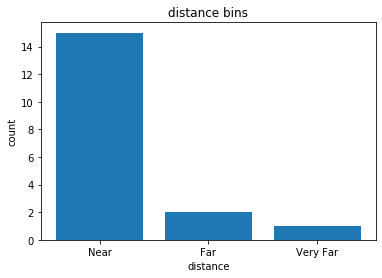

In [150]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, vr_distance['distance-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("distance")
plt.pyplot.ylabel("count")
plt.pyplot.title("distance bins")

## 4. Summary




1.	Where are the Universities-Colleges in Toronto are located?
    -  13 Colleges-Universities has been assessed. 8 of the University and Colleges are in the vicinity of the most of the VR Arcade establishments. Around 15 out of 17 to be exact.
       University of Toronta has been considered the center of the area assessed.


2.	How many VR Arcades are there and how are they distributed in Toronto?
    - 17 VR Arcade and VR Commercial establishments has been identified by Foursquare.


3.	Is the assumption,'Colleges and VR Arcades are being established near each other do to it's popularity and demand among young adults', is accurate and if so is there room for investment?
    - 8 out of 13 University and Colleges are in the vicinity of the most VR Arcade establishments. Around 14 out of 17 to be exact
    - 5 of the University-Colleges are approximately 10 to 15 km distance away from the mentioned central location where all the fun is.


### Conclusion

Most of the VR Arcade establishments are in the vicinity of Colleges and Universities therefore there seems to be  room for investment with further research.

Other factors, such as location, other venues, transportation, popularity of location, demographics of locations etc.. should be taken into consideration during in-depth analysis.



